## Linear Regression

In [142]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns;sns.set()
import numpy as np

# Assign the dataframe to this variable.
bmi_life_data = pd.read_csv('./datasets/bmi_and_life_expectancy.csv')

In [2]:
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [3]:
X = bmi_life_data[['BMI']]
y = bmi_life_data[['Life expectancy']]

In [28]:
bmi_life_model = LinearRegression()
bmi_life_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

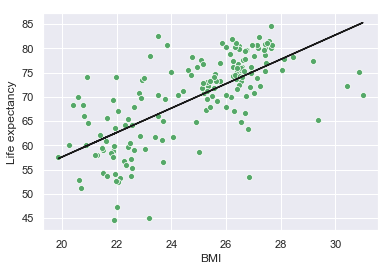

In [30]:
sns.scatterplot(x="BMI", y="Life expectancy", data=bmi_life_data, color='G')
plt.plot(X, bmi_life_model.predict(X), color='K')
plt.show()

## Multiple Linear Regression

In [31]:
# Load the data from the boston house-prices dataset 
from sklearn.datasets import load_boston
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

In [38]:
model = LinearRegression()
model.fit(x, y)
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
prediction = model.predict(sample_house)
print(prediction)

[23.68420569]


## Polynomial Regression

In [198]:
from sklearn.preprocessing import PolynomialFeatures
train_data  = pd.read_csv('./datasets/data.csv')
X = train_data ['Var_X'].values.reshape(-1, 1)
y = train_data ['Var_Y'].values
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

In [200]:
poly_model = LinearRegression(fit_intercept = False)
poly_model.fit(X_poly, y)
poly_model.score(X_poly, y)
pred = poly_model.predict(X_poly)

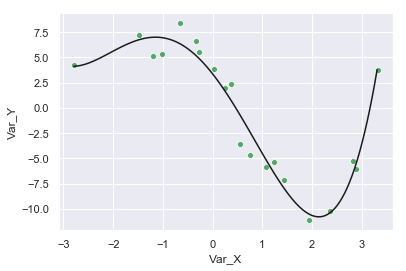

In [202]:
sns.scatterplot(x="Var_X", y="Var_Y", data=train_data, color='G')
X_plot = np.arange(np.min(X), np.max(X), 0.05).reshape(-1, 1)
X_plot_poly = poly_feat.fit_transform(X_plot)
plt.plot(X_plot, poly_model.predict(X_plot_poly), color='K')
plt.show()

### Regularization 

In [223]:
from sklearn.linear_model import Lasso
df  = pd.read_csv('./datasets/regul_data.csv', header=None)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
df.head()

,0,1,2,3,4,5,6
0,1.25664,2.04978,-6.23640,4.71926,-4.26931,0.20590,12.31798
1,-3.89012,-0.37511,6.14979,4.94585,-3.57844,0.00640,23.67628
2,5.09784,0.98120,-0.29939,5.85805,0.28297,-0.20626,-1.53459
3,0.39034,-3.06861,-5.63488,6.43941,0.39256,-0.07084,-24.68670
4,5.84727,-0.15922,11.41246,7.52165,1.69886,0.29022,17.54122


In [252]:
lasso_reg = Lasso()
lasso_reg.fit(X, y)
print(lasso_reg.coef_)
print(lasso_reg.score(X, y))
y_pred = X.dot(lasso_reg.coef_) # = lasso.predict(X)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]
0.9873915741007478


## Features scaling

In [254]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()

X_scaled = scaler.fit_transform(X)

lasso_reg = Lasso()

lasso_reg.fit(X_scaled, y)

y_pred = lasso_reg.predict(X_scaled)

print(lasso_reg.coef_)
print(lasso_reg.score(X_scaled, y))

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]
0.9820317191993524
